In [1]:
# t-SNE and PCA plot metric and times
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from matplotlib.pyplot import scatter, figure, subplot, savefig
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import time

'''https://portals.broadinstitute.org/single_cell/study
/atlas-of-human-blood-dendritic-cells-and-monocytes

Do pie chart of % of each cell class.
'''

/Users/dawnstear/desktop/tensorflow_update/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dawnstear/desktop/tensorflow_update/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


'https://portals.broadinstitute.org/single_cell/study\n/atlas-of-human-blood-dendritic-cells-and-monocytes\n\nDo pie chart of % of each cell class.\n'

In [5]:
data  =  pd.read_csv('/Users/dawnstear/desktop/Mid_Atlantic_Poster/sc_data/n_1078/data.csv')  
print(np.shape(data))

np.random.seed(42)
data = shuffle(data)
celltypes = data['TYPE'] # save cell type vector in case we need it later
labels = data['Labels'] # save labels
data_ = data.drop(['Labels','TYPE'],axis=1) 
cellcount, genecount = np.shape(data_)
X = data_
y = labels

(1078, 26596)


In [4]:
%%timeit
np.random.seed(42)
data = shuffle(data)
celltypes = data['TYPE'] # save cell type vector in case we need it later
labels = data['Labels'] # save labels
data_ = data.drop(['Labels','TYPE'],axis=1) 
cellcount, genecount = np.shape(data_)
X = data_
y = labels
print(np.size(X)) # 28.66 mil

UnboundLocalError: local variable 'data' referenced before assignment

In [9]:
start = time.time()
X_tsne = TSNE(learning_rate=100)
X_tsne = X_tsne.fit_transform(X)
time_elapsed = time.time() - start
print(time_elapsed)

44.4728786945343


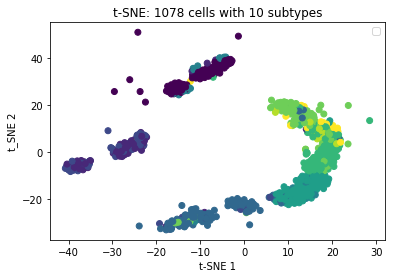

<Figure size 7200x7200 with 0 Axes>

In [20]:
fig, ax = plt.subplots()
figure(figsize=(100, 100))
#subplot(121)
ax.set(xlabel='t-SNE 1', ylabel='t_SNE 2',title='t-SNE: 1078 cells with 10 subtypes')
ax.legend(y)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)


In [31]:
# PCA 1078
start = time.time()
pca = PCA(n_components=2, svd_solver='full')
pca_array = pca.fit_transform(X) 
time_elapsed = time.time() - start
print(time_elapsed)

13.157204866409302


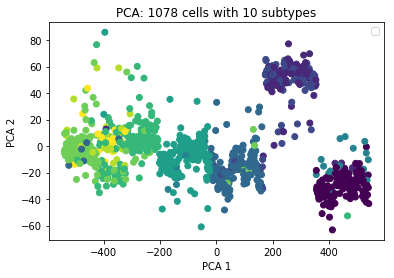

<Figure size 720x720 with 0 Axes>

In [35]:
fig, ax = plt.subplots()
figure(figsize=(10, 10))
ax.set(xlabel='PCA 1', ylabel='PCA 2',title='PCA: 1078 cells with 10 subtypes')
ax.legend(y)
ax.scatter(pca_array[:, 0], pca_array[:, 1], c=y)

In [41]:
FPATH = '/Users/dawnstear/desktop/chop_cellpred/newimg.pdf'
fig.savefig(FPATH)